Ở buổi học này, bạn hãy xây dựng một giao diện tkinter và ứng dụng các kiến thức đã học trong khóa học “Python Fundamental” theo các yêu cầu như sau: 
1.	Xây dựng một ứng dụng tkinter để quản lý nhà sách dựa theo ứng dụng tkinter mẫu đã học
2.	Thông tin của mỗi quyển sách cần quản lý: tên sách, thể loại và giá tiền
3.	Các chức năng cần có: thêm sách mới, tìm kiếm và hiển thị thông tin sách, xóa sách, cập nhật giá tiền của sách
4.	Các widget cần sử dụng: Entry, Label, Button, MessageBox. Có thể sử dụng thêm các widget khác như combobox, TreeView

In [2]:
import tkinter as tk
from tkinter import messagebox
from tkinter.ttk import Treeview

window = tk.Tk()
window.title("Book Management")

book_list = []

def add_book():
    book_name = entry_book_name.get()
    book_genre = entry_book_genre.get()
    book_price = entry_book_price.get()

    if book_name and book_genre and book_price:
        book = (book_name, book_genre, book_price)
        book_list.append(book)
        messagebox.showinfo("Notification", "Added book successfully")
    else:
        messagebox.showerror("Error", "Please enter all required information")

   
    entry_book_name.delete(0, tk.END)
    entry_book_genre.delete(0, tk.END)
    entry_book_price.delete(0, tk.END)


def search_book():
    book_name = entry_search.get()
    search_results = []

    if book_name:
        for book in book_list:
            if book_name.lower() in book[0].lower():
                search_results.append(book)

        if search_results:
            display_books(search_results)
        else:
            messagebox.showerror("Notification", "No results found")
    else:
        messagebox.showerror("Error", "Please enter book name")

    entry_search.delete(0, tk.END)

def delete_book():
    selected_item = treeview.focus()

    if selected_item:
        confirmation = messagebox.askyesno("Confirmation", "Delete this book?")
        if confirmation:
            treeview.delete(selected_item)
            for book in book_list:
                if book[0] == treeview.item(selected_item)["values"][0]:
                    book_list.remove(book)
                    break
            messagebox.showinfo("Notification", "Deleted book successfully")
    else:
        messagebox.showerror("Error", "Please enter book name")

def update_price():
    selected_item = treeview.focus()

    if selected_item:
        new_price = entry_update_price.get()
        if new_price:
            treeview.set(selected_item, column="price", value=new_price)
            for book in books:
                if book[0] == treeview.item(selected_item)["values"][0]:
                    book = (book[0], book[1], new_price)
                    break
            messagebox.showinfo("Notification", "Updated book price successfully")
        else:
            messagebox.showerror("Error", "Please enter new price")
    else:
        messagebox.showerror("Error", "Please choose book to update price")

    entry_update_price.delete(0, tk.END)


def display_books(book_list):
    treeview.delete(*treeview.get_children())
    for book in book_list:
        treeview.insert("", tk.END, values=book)


label_book_name = tk.Label(window, text="Book name:")
label_book_name.grid(row=0, column=0, sticky="w")
entry_book_name = tk.Entry(window)
entry_book_name.grid(row=0, column=1)

label_book_genre = tk.Label(window, text="Book genre:")
label_book_genre.grid(row=1, column=0, sticky="w")
entry_book_genre = tk.Entry(window)
entry_book_genre.grid(row=1, column=1)

label_book_price = tk.Label(window, text="Price:")
label_book_price.grid(row=2, column=0, sticky="w")
entry_book_price = tk.Entry(window)
entry_book_price.grid(row=2, column=1)

button_add = tk.Button(window, text="Add book", command=add_book)
button_add.grid(row=3, column=0)

label_search = tk.Label(window, text="Search book:")
label_search.grid(row=4, column=0, sticky="w")
entry_search = tk.Entry(window)
entry_search.grid(row=4, column=1)
button_search = tk.Button(window, text="Search book", command=search_book)
button_search.grid(row=4, column=2)

treeview = Treeview(window, columns=("name", "genre", "price"), show="headings")
treeview.heading("name", text="Book name")
treeview.heading("genre", text="Book genre")
treeview.heading("price", text="Price")
treeview.grid(row=5, column=0, columnspan=3)

button_delete = tk.Button(window, text="Delete book", command=delete_book)
button_delete.grid(row=6, column=0)

label_update_price = tk.Label(window, text="New price:")
label_update_price.grid(row=7, column=0, sticky="w")
entry_update_price = tk.Entry(window)
entry_update_price.grid(row=7, column=1)
button_update_price = tk.Button(window, text="Update price", command=update_price)
button_update_price.grid(row=7, column=2)


window.mainloop()

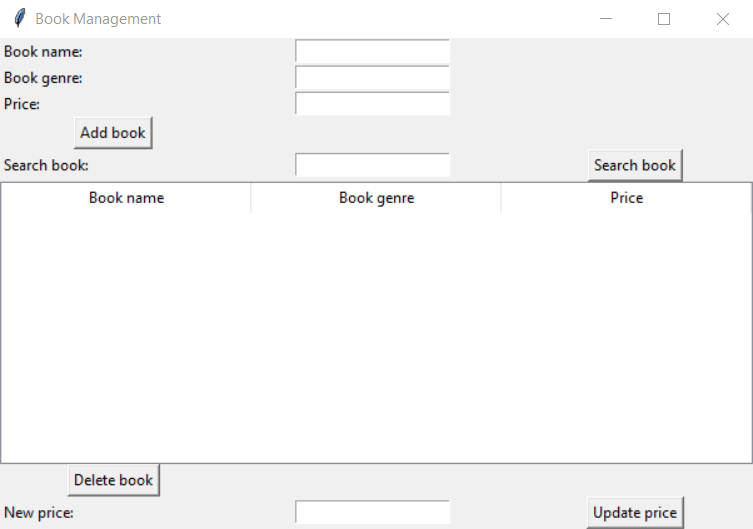